## 確認套件已經安裝 & Get data

In [1]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.regularizers import l1, l2, l1_l2
import keras.backend as K

Building a model with dropout rate: 0
Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 0s 234us/step - loss: 1.7045 - acc: 0.4915 - val_loss: 1.3025 - val_acc: 0.5924
Epoch 2/50
1652/1652 [==============================] - 0s 146us/step - loss: 1.2188 - acc: 0.5636 - val_loss: 1.3144 - val_acc: 0.4837
Epoch 3/50
1652/1652 [==============================] - 0s 141us/step - loss: 1.1068 - acc: 0.5969 - val_loss: 1.0388 - val_acc: 0.6304
Epoch 4/50
1652/1652 [==============================] - 0s 127us/step - loss: 1.0825 - acc: 0.6053 - val_loss: 0.9775 - val_acc: 0.6522
Epoch 5/50
1652/1652 [==============================] - 0s 172us/step - loss: 0.9908 - acc: 0.6483 - val_loss: 0.9262 - val_acc: 0.6793
Epoch 6/50
1652/1652 [==============================] - 0s 158us/step - loss: 0.9671 - acc: 0.6544 - val_loss: 0.8732 - val_acc: 0.6902
Epoch 7/50
1652/1652 [==============================] - 0s 149us/step - loss: 0.9198 - acc: 0.6792 

1652/1652 [==============================] - 0s 179us/step - loss: 1.1208 - acc: 0.5975 - val_loss: 0.9868 - val_acc: 0.6576
Epoch 5/50
1652/1652 [==============================] - 0s 177us/step - loss: 1.1009 - acc: 0.6071 - val_loss: 0.9296 - val_acc: 0.6793
Epoch 6/50
1652/1652 [==============================] - 0s 169us/step - loss: 1.0452 - acc: 0.6156 - val_loss: 0.8554 - val_acc: 0.6902
Epoch 7/50
1652/1652 [==============================] - 0s 183us/step - loss: 1.0014 - acc: 0.6416 - val_loss: 0.8827 - val_acc: 0.6630
Epoch 8/50
1652/1652 [==============================] - 0s 177us/step - loss: 0.9664 - acc: 0.6477 - val_loss: 0.8792 - val_acc: 0.6685
Epoch 9/50
1652/1652 [==============================] - 0s 177us/step - loss: 0.9442 - acc: 0.6695 - val_loss: 0.8317 - val_acc: 0.6902
Epoch 10/50
1652/1652 [==============================] - 0s 177us/step - loss: 0.9109 - acc: 0.6786 - val_loss: 0.8270 - val_acc: 0.6848
Epoch 11/50
1652/1652 [==============================] - 0

1652/1652 [==============================] - 1s 332us/step - loss: 2.4066 - acc: 0.3898 - val_loss: 1.1824 - val_acc: 0.5924
Epoch 2/50
1652/1652 [==============================] - 0s 184us/step - loss: 1.3926 - acc: 0.4982 - val_loss: 1.0753 - val_acc: 0.6359
Epoch 3/50
1652/1652 [==============================] - 0s 181us/step - loss: 1.2537 - acc: 0.5539 - val_loss: 1.0696 - val_acc: 0.6196
Epoch 4/50
1652/1652 [==============================] - 0s 183us/step - loss: 1.1682 - acc: 0.5920 - val_loss: 1.0298 - val_acc: 0.6467
Epoch 5/50
1652/1652 [==============================] - 0s 191us/step - loss: 1.1274 - acc: 0.5932 - val_loss: 1.0013 - val_acc: 0.6467
Epoch 6/50
1652/1652 [==============================] - 0s 180us/step - loss: 1.0953 - acc: 0.6120 - val_loss: 0.9312 - val_acc: 0.6576
Epoch 7/50
1652/1652 [==============================] - 0s 183us/step - loss: 1.0446 - acc: 0.6156 - val_loss: 0.9109 - val_acc: 0.6957
Epoch 8/50
1652/1652 [==============================] - 0s 

1652/1652 [==============================] - 0s 181us/step - loss: 0.8874 - acc: 0.6943 - val_loss: 0.7701 - val_acc: 0.7228
Epoch 15/50
1652/1652 [==============================] - 0s 185us/step - loss: 0.8793 - acc: 0.6846 - val_loss: 0.7433 - val_acc: 0.7174
Epoch 16/50
1652/1652 [==============================] - 0s 185us/step - loss: 0.8543 - acc: 0.6985 - val_loss: 0.7582 - val_acc: 0.7283
Epoch 17/50
1652/1652 [==============================] - 0s 187us/step - loss: 0.8375 - acc: 0.7076 - val_loss: 0.7691 - val_acc: 0.7120
Epoch 18/50
1652/1652 [==============================] - 0s 187us/step - loss: 0.8182 - acc: 0.7046 - val_loss: 0.8079 - val_acc: 0.7174
Building a model with dropout rate: 0.4
Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 1s 350us/step - loss: 3.2938 - acc: 0.3565 - val_loss: 1.2531 - val_acc: 0.5489
Epoch 2/50
1652/1652 [==============================] - 0s 176us/step - loss: 1.5246 - acc: 0.4764 - val

1652/1652 [==============================] - 0s 176us/step - loss: 1.1250 - acc: 0.5944 - val_loss: 0.9630 - val_acc: 0.6467
Epoch 10/50
1652/1652 [==============================] - 0s 176us/step - loss: 1.0886 - acc: 0.6047 - val_loss: 0.9441 - val_acc: 0.6685
Epoch 11/50
1652/1652 [==============================] - 0s 181us/step - loss: 1.0819 - acc: 0.6005 - val_loss: 0.8985 - val_acc: 0.6685
Epoch 12/50
1652/1652 [==============================] - 0s 188us/step - loss: 1.0432 - acc: 0.6199 - val_loss: 0.9025 - val_acc: 0.6957
Epoch 13/50
1652/1652 [==============================] - 0s 179us/step - loss: 1.0498 - acc: 0.6199 - val_loss: 0.9256 - val_acc: 0.6739
Epoch 14/50
1652/1652 [==============================] - 0s 181us/step - loss: 1.0226 - acc: 0.6283 - val_loss: 0.8891 - val_acc: 0.6848
Epoch 15/50
1652/1652 [==============================] - 0s 183us/step - loss: 1.0237 - acc: 0.6301 - val_loss: 0.8546 - val_acc: 0.6793
Epoch 16/50
1652/1652 [==============================

1652/1652 [==============================] - 0s 183us/step - loss: 3.7022 - acc: 0.3789 - val_loss: 1.4075 - val_acc: 0.5163
Epoch 5/50
1652/1652 [==============================] - 0s 179us/step - loss: 1.6317 - acc: 0.4540 - val_loss: 1.4053 - val_acc: 0.5163
Epoch 6/50
1652/1652 [==============================] - 0s 195us/step - loss: 1.4558 - acc: 0.5030 - val_loss: 1.3890 - val_acc: 0.5163
Epoch 7/50
1652/1652 [==============================] - 0s 180us/step - loss: 1.4072 - acc: 0.5145 - val_loss: 1.3593 - val_acc: 0.5163
Epoch 8/50
1652/1652 [==============================] - 0s 179us/step - loss: 1.3861 - acc: 0.5151 - val_loss: 1.3348 - val_acc: 0.5163
Epoch 9/50
1652/1652 [==============================] - 0s 183us/step - loss: 1.3674 - acc: 0.5194 - val_loss: 1.3268 - val_acc: 0.5163
Epoch 10/50
1652/1652 [==============================] - 0s 189us/step - loss: 1.3659 - acc: 0.5176 - val_loss: 1.3327 - val_acc: 0.5163
Epoch 11/50
1652/1652 [==============================] - 0

Epoch 18/50
1652/1652 [==============================] - 0s 185us/step - loss: 1.3431 - acc: 0.5230 - val_loss: 1.2846 - val_acc: 0.5163
Epoch 19/50
1652/1652 [==============================] - 0s 182us/step - loss: 1.3476 - acc: 0.5206 - val_loss: 1.2809 - val_acc: 0.5163


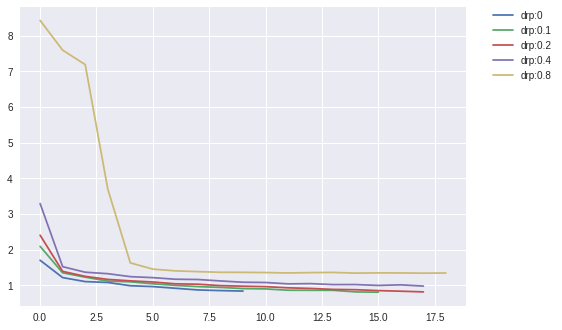

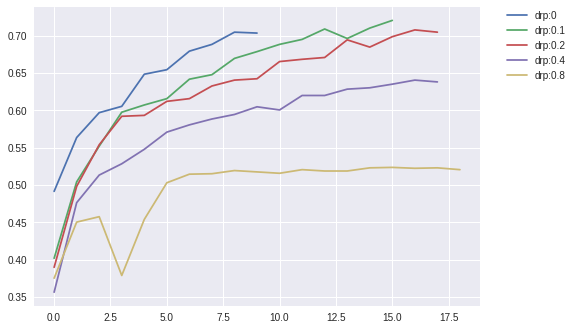

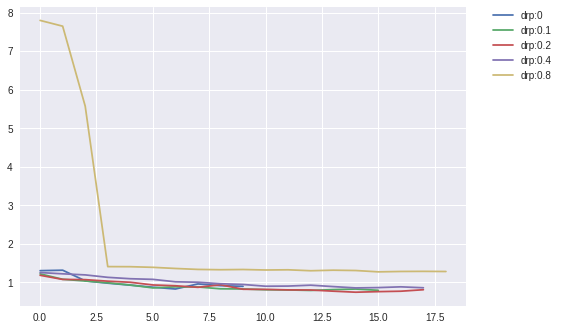

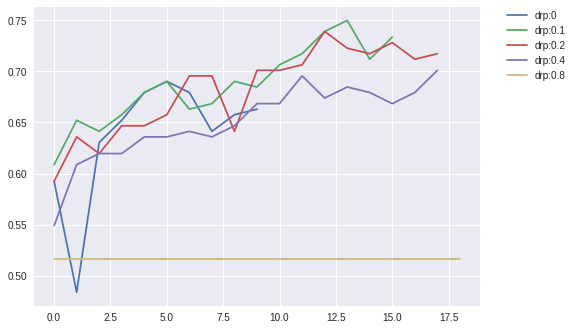

In [4]:
#@title Dropout { vertical-output: true, display-mode: "both" }
from keras.layers import Dropout
drp_rate_list = [0, 0.1, 0.2, 0.4, 0.8] #@param {type:"raw"}

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)

K.clear_session()

train_loss_list, train_acc_list = [], []
valid_loss_list, valid_acc_list = [], []

for drp_rate in drp_rate_list:
  print('Building a model with dropout rate: %g' % (drp_rate))
  x_input = Input(shape = [X_train.shape[1]])

  x = Dense(128)(x_input)
  x = Activation('relu')(x)
  x = Dropout(drp_rate)(x)

  x = Dense(256)(x)
  x = Activation('relu')(x)
  x = Dropout(drp_rate)(x)

  x = Dense(5)(x)
  out = Activation('softmax')(x)

  model = Model(inputs=[x_input], outputs=[out])

  optim = Adam(lr = 0.001)

  model.compile(loss='categorical_crossentropy',
          optimizer=optim,
          metrics=['accuracy'])
  #model.summary()

  batch_size = 16
  epochs = 50

  history = model.fit(X_train, Y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1,
                callbacks = [early_stopping])

  loss	= history.history.get('loss')
  acc 	= history.history.get('acc')

  val_loss = history.history.get('val_loss')
  val_acc = history.history.get('val_acc')
  
  train_loss_list.append(loss)
  valid_loss_list.append(val_loss)
  train_acc_list.append(acc)
  valid_acc_list.append(val_acc)

  
list_len = len(train_loss_list)

# training loss
for i in np.arange(list_len):
  plt.plot(np.arange(len(train_loss_list[i])), train_loss_list[i], label = 'drp:%g' % (drp_rate_list[i]) )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# training acc
for i in np.arange(list_len):
  plt.plot(np.arange(len(train_acc_list[i])), train_acc_list[i], label = 'drp:%g' % (drp_rate_list[i]) )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# valid loss
for i in np.arange(list_len):
  plt.plot(np.arange(len(valid_loss_list[i])), valid_loss_list[i], label = 'drp:%g' % (drp_rate_list[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# valid acc
for i in np.arange(list_len):
  plt.plot(np.arange(len(valid_acc_list[i])), valid_acc_list[i], label = 'drp:%g' % (drp_rate_list[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

